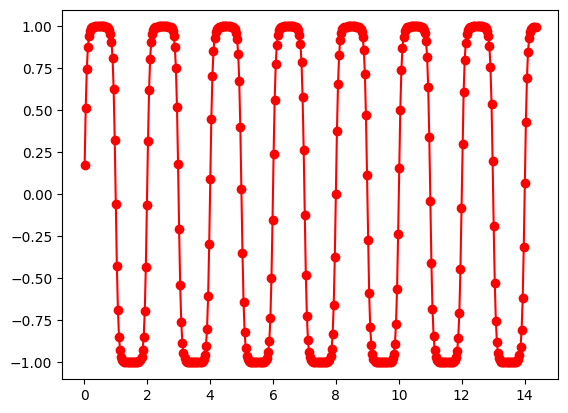

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
import csv
from numpy.typing import NDArray

t = np.array([])
H = np.array([])

with open("H_field.csv", newline='', encoding='utf-8') as archivo:
    lector = list(csv.reader(archivo))
    
    t = [float(d[0]) for d in lector[1:] if d[0]]
    H = [float(d[1]) for d in lector[1:] if d[1]]

plt.plot(t,H,color = 'r',marker='o')


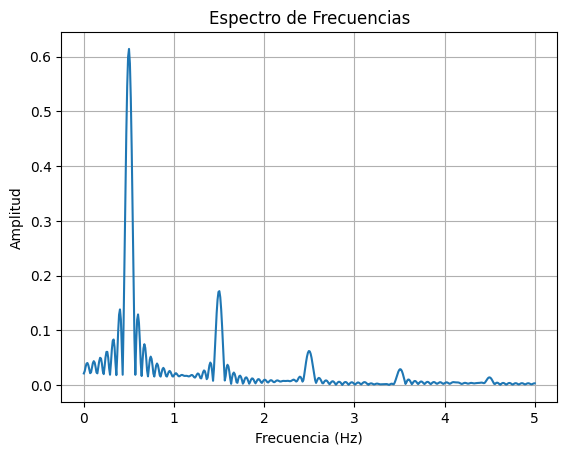

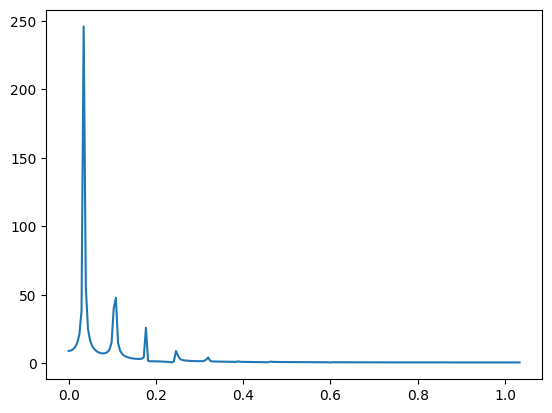

In [52]:
def Fourier(t:NDArray[float], y:NDArray[float], 
            f:NDArray[float]) -> NDArray[complex]:
    
    fourier_list = []  # Lista para almacenar la transformada de cada frecuencia
    
    for freq in f:
        fu = 0  # Inicializamos el acumulador para la suma en cada frecuencia
        for k in range(len(t)):
            fu += y[k] * np.exp(-2j * np.pi * freq * t[k])  # Suma compleja
        fourier_list.append(abs(fu)/len(t))  # Magnitud de la transformada
    
    # Graficar el espectro de frecuencias
    #nyquist = 1/0.01
    plt.plot(f, fourier_list,label='Transformada Discreta')
    #plt.plot(f,2*np.exp(-((f-1.3)/2)**2),color='orange')
    #plt.axvline(x=nyquist, color='r', linestyle='--')
    plt.title("Espectro de Frecuencias")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.show()
    
    return fourier_list

f_list = np.linspace(0,5,500)
fu = Fourier(t,H,f_list)

tn = [d for d in t if d<1]

samplerate = len(tn)


freq = np.fft.rfft(H)
n = len(H)
fftfreq= np.fft.rfftfreq(n,14./samplerate)


plt.plot(fftfreq,np.abs(freq))